In [64]:
from implementation import nsga2, Individual
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.problems import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
import pygmo as pg
from matplotlib import pyplot as plt
import numpy as np
from pymoo.indicators.hv import HV

In [65]:
from test_functions import ZDT1, ZDT2, ZDT3

In [66]:
from pymoo.algorithms.moo.spea2 import SPEA2

In [67]:
initial_population = None

In [68]:
population_size = 100 
num_variables = 30
num_generations = 500
tournament_size = 3
mutation_prob = 0.033
elitism_size = 10
objective_function=ZDT2
objective_function_text = "zdt2"
reference_point=[1.2,1.5] 

In [69]:
def calc_hv_nsga2(population_size, num_variables, num_generations, tournament_size,
                  mutation_prob, elitism_size, objective_function, reference_point):
    """
    Calculate hypervolumen of my implementation of nsga2 algorithm
    """
    final_pareto_front = nsga2(population_size=population_size, 
                         num_variables=num_variables,
                         num_generations=num_generations, 
                         tournament_size=tournament_size,
                         mutation_prob=mutation_prob, 
                         elitism_size=elitism_size,
                         objective_function=objective_function,
                         initial_population=initial_population)
    pareto_front = [(ind.fitness[0], ind.fitness[1]) for ind in final_pareto_front]
    pareto_front_array = np.array(pareto_front)
    hv = pg.hypervolume(pareto_front_array)
    return hv.compute(reference_point)

In [70]:
def calc_hv_spea2(population_size, num_generations, problem_name, reference_point, initial_population):
    
    problem = get_problem(problem_name)
    algorithm = SPEA2(pop_size=population_size)
    res = minimize(problem, 
                   algorithm, 
                   ('n_gen', num_generations), 
                   seed=1, 
                   verbose=False)
    hv = pg.hypervolume(res.F)
    return hv.compute(reference_point)

In [71]:
hv_nsga2 = calc_hv_nsga2(population_size, num_variables, 
                         num_generations, tournament_size, 
                         mutation_prob, elitism_size, objective_function, 
                         reference_point)

hv_spea2 = calc_hv_spea2(population_size, num_generations, 
                               objective_function_text, reference_point, initial_population)

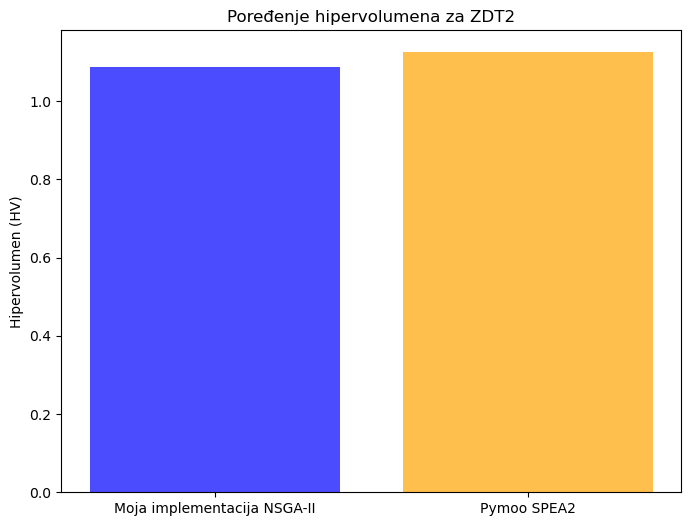

In [72]:
labels = ['Moja implementacija NSGA-II', 'Pymoo SPEA2']
values = [hv_nsga2, hv_spea2]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange'], alpha=0.7)
plt.ylabel('Hipervolumen (HV)')
plt.title(f'Poređenje hipervolumena za {objective_function_text.upper()}')
plt.show()

In [73]:
def calc_ms_nsga2(population_size, num_variables, num_generations, tournament_size,
                   mutation_prob, elitism_size, objective_function,
                   initial_population):
    final_pareto_front = nsga2(population_size=population_size, 
                                num_variables=num_variables,
                                num_generations=num_generations, 
                                tournament_size=tournament_size,
                                mutation_prob=mutation_prob, 
                                elitism_size=elitism_size,
                                objective_function=objective_function,
                                initial_population=initial_population)
    pareto_front = [(ind.fitness[0], ind.fitness[1]) for ind in final_pareto_front]
    pareto_front = np.array(pareto_front)
    pareto_front_sorted = pareto_front[np.argsort(pareto_front[:, 0])]
    distances = np.linalg.norm(np.diff(pareto_front_sorted, axis=0), axis=1)
    ms = np.sum(distances) / len(distances)
    return ms

In [74]:
def calc_ms_spea2(population_size, num_generations, 
                  problem_name, initial_population):
    problem = get_problem(problem_name)
    algorithm = SPEA2(pop_size=population_size)
    res = minimize(problem, 
                   algorithm, 
                   ('n_gen', num_generations), 
                   seed=1, 
                   verbose=False)
    pareto_front = res.F
    pareto_front = np.array(pareto_front)
    pareto_front_sorted = pareto_front[np.argsort(pareto_front[:, 0])]
    distances = np.linalg.norm(np.diff(pareto_front_sorted, axis=0), axis=1)
    ms = np.sum(distances) / len(distances) 
    return ms

In [75]:
ms_nsga2 = calc_ms_nsga2(population_size, num_variables, 
              num_generations, tournament_size,
              mutation_prob, elitism_size, 
              objective_function, initial_population)
ms_spea2 = calc_ms_spea2(population_size, num_generations, 
                         objective_function_text, initial_population)

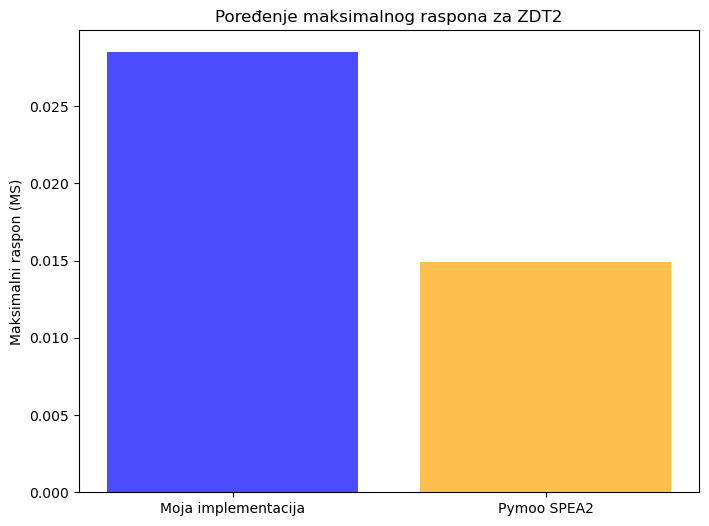

In [76]:
labels = ['Moja implementacija', 'Pymoo SPEA2']
values = [ms_nsga2, ms_spea2]

plt.figure(figsize=(8, 6))
plt.bar(labels, values, color=['blue', 'orange'], alpha=0.7)
plt.ylabel('Maksimalni raspon (MS)')
plt.title(f'Poređenje maksimalnog raspona za {objective_function_text.upper()}')
plt.show()

In [77]:
final_pareto_front_nsga2 = nsga2(population_size, num_variables, 
              num_generations, tournament_size,
              mutation_prob, elitism_size, 
              objective_function, initial_population)

In [78]:
problem = get_problem(objective_function_text)

algorithm = SPEA2(pop_size=population_size)
res = minimize(problem,
               algorithm,
               ('n_gen', num_generations),
               seed=1,
               verbose=False)
final_pareto_front_spea2 = res.F

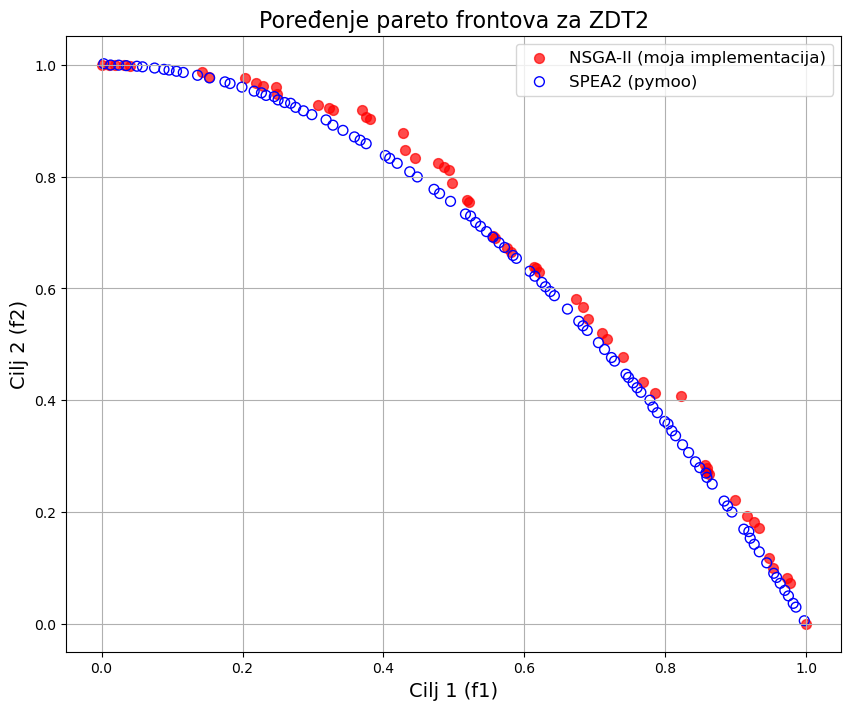

In [79]:

pareto_f1_values_nsga2 = [ind.fitness[0] for ind in final_pareto_front_nsga2]
pareto_f2_values_nsga2 = [ind.fitness[1] for ind in final_pareto_front_nsga2]

pareto_f1_values_spea2 = res.F[:, 0]
pareto_f2_values_spea2 = res.F[:, 1] 

true_pareto_f1 = final_pareto_front_spea2[:, 0]
true_pareto_f2 = final_pareto_front_spea2[:, 1]
plt.figure(figsize=(10, 8))
plt.scatter(pareto_f1_values_nsga2, pareto_f2_values_nsga2, c='red', label='NSGA-II (moja implementacija)', s=50, alpha=0.7)
plt.scatter(pareto_f1_values_spea2, pareto_f2_values_spea2, edgecolor='blue', facecolor='none', label='SPEA2 (pymoo)', s=50)

plt.xlabel('Cilj 1 (f1)', fontsize=14)
plt.ylabel('Cilj 2 (f2)', fontsize=14)
plt.title(f'Poređenje pareto frontova za {objective_function_text.upper()}', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()